In [13]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [14]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [15]:
# Define the CNN model:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [16]:
# Compile the model and specify the loss function and optimizer:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8175 - accuracy: 0.7126 - val_loss: 0.8892 - val_accuracy: 0.6938
Epoch 2/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7638 - accuracy: 0.7322 - val_loss: 0.9470 - val_accuracy: 0.6813
Epoch 3/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.7274 - accuracy: 0.7461 - val_loss: 0.8792 - val_accuracy: 0.7007
Epoch 4/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.6951 - accuracy: 0.7560 - val_loss: 0.8931 - val_accuracy: 0.6999
Epoch 5/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.6588 - accuracy: 0.7696 - val_loss: 0.8598 - val_accuracy: 0.7126
Epoch 6/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6209 - accuracy: 0.7823 - val_loss: 0.8876 - val_accuracy: 0.7029
Epoch 7/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.5896 - accuracy: 0.7914 - val_loss: 0.8557 -

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 2s - loss: 0.9078 - accuracy: 0.7112 - 2s/epoch - 6ms/step
Test accuracy: 0.7111999988555908


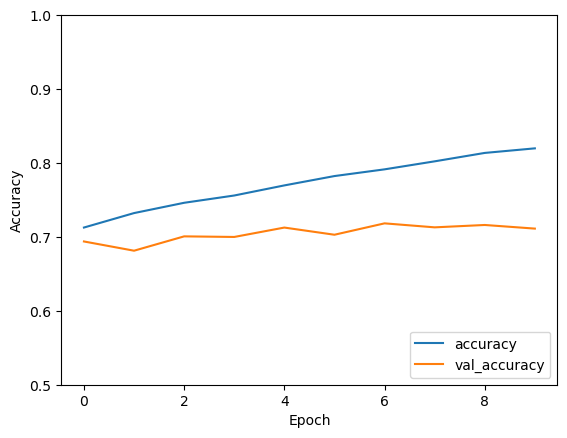

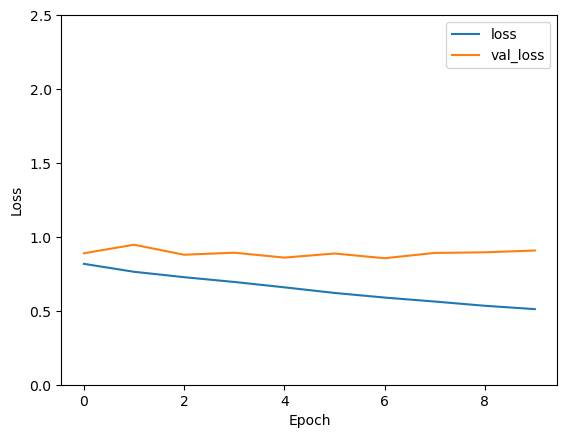

In [20]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 2.5])
plt.legend(loc='upper right')
plt.show()